In [121]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling 
# from pandas_profiling import *

# from pandas_profiling import ProfileReport

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [122]:
df = pd.read_csv('Lotto Result.csv',index_col=0)
df.head()

,Date,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Machine,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total
#,,,,,,,,,,,,,,,,,,,
104,20/01/2021,13,5,7,57,25,3,37,8,Lancelot,110,6,0,25,0,0,0,1,26
103,16/01/2021,48,38,45,3,53,15,27,7,Guinevere,202,4,2,23,1,0,0,1,25
102,13/01/2021,1,42,8,18,16,12,4,7,Guinevere,97,1,5,31,3,0,0,1,35
101,09/01/2021,9,38,21,30,23,35,53,6,Guinevere,156,4,2,39,4,0,0,1,44
100,06/01/2021,54,36,2,8,51,52,10,6,Guinevere,203,1,5,11,1,0,0,1,13


In [123]:
df = df.reset_index()
df.head()

,#,Date,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Machine,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total
0,104,20/01/2021,13,5,7,57,25,3,37,8,Lancelot,110,6,0,25,0,0,0,1,26
1,103,16/01/2021,48,38,45,3,53,15,27,7,Guinevere,202,4,2,23,1,0,0,1,25
2,102,13/01/2021,1,42,8,18,16,12,4,7,Guinevere,97,1,5,31,3,0,0,1,35
3,101,09/01/2021,9,38,21,30,23,35,53,6,Guinevere,156,4,2,39,4,0,0,1,44
4,100,06/01/2021,54,36,2,8,51,52,10,6,Guinevere,203,1,5,11,1,0,0,1,13


In [124]:
df = df.drop('#',axis=1)
df.head()

,Date,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Machine,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total
0,20/01/2021,13,5,7,57,25,3,37,8,Lancelot,110,6,0,25,0,0,0,1,26
1,16/01/2021,48,38,45,3,53,15,27,7,Guinevere,202,4,2,23,1,0,0,1,25
2,13/01/2021,1,42,8,18,16,12,4,7,Guinevere,97,1,5,31,3,0,0,1,35
3,09/01/2021,9,38,21,30,23,35,53,6,Guinevere,156,4,2,39,4,0,0,1,44
4,06/01/2021,54,36,2,8,51,52,10,6,Guinevere,203,1,5,11,1,0,0,1,13


In [125]:
print(df.shape)
df.info()

(100, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
Date          100 non-null object
Ball 1        100 non-null int64
Ball 2        100 non-null int64
Ball 3        100 non-null int64
Ball 4        100 non-null int64
Ball 5        100 non-null int64
Ball 6        100 non-null int64
Ball bonus    100 non-null int64
Ball Set      100 non-null int64
Machine       100 non-null object
Sum 1-6       100 non-null int64
Odd           100 non-null int64
Even          100 non-null int64
3             100 non-null int64
4             100 non-null int64
5             100 non-null int64
5+B           100 non-null int64
6             100 non-null int64
Total         100 non-null int64
dtypes: int64(17), object(2)
memory usage: 14.9+ KB


In [126]:
df.describe()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000
mean,31.690000,30.59000,28.180000,31.220000,31.100000,32.590000,28.18000,5.430000,185.370000,3.090000,2.910000,26.110000,1.150000,0.030000,0.0,1.0,28.290000
std,17.906432,16.79171,17.482678,16.267697,16.340753,17.589652,16.59888,2.982288,45.046475,1.198442,1.198442,12.838464,1.209182,0.171447,0.0,0.0,13.472227
min,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,2.00000,1.000000,66.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.0,1.0,5.000000
25%,15.750000,18.00000,12.500000,17.750000,19.000000,18.750000,13.00000,3.000000,151.500000,2.000000,2.000000,15.000000,0.000000,0.000000,0.0,1.0,16.750000
50%,35.000000,31.00000,27.000000,33.000000,30.000000,33.500000,26.50000,5.000000,188.000000,3.000000,3.000000,25.000000,1.000000,0.000000,0.0,1.0,26.000000
75%,48.000000,44.25000,45.000000,45.000000,47.250000,49.000000,44.00000,8.000000,215.000000,4.000000,4.000000,37.000000,2.000000,0.000000,0.0,1.0,39.000000
max,59.000000,59.00000,59.000000,58.000000,58.000000,59.000000,59.00000,11.000000,267.000000,6.000000,5.000000,54.000000,5.000000,1.000000,0.0,1.0,58.000000


In [127]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [128]:
df.head()

,Date,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Machine,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total
0,20/01/2021,13,5,7,57,25,3,37,8,Lancelot,110,6,0,25,0,0,0,1,26
1,16/01/2021,48,38,45,3,53,15,27,7,Guinevere,202,4,2,23,1,0,0,1,25
2,13/01/2021,1,42,8,18,16,12,4,7,Guinevere,97,1,5,31,3,0,0,1,35
3,09/01/2021,9,38,21,30,23,35,53,6,Guinevere,156,4,2,39,4,0,0,1,44
4,06/01/2021,54,36,2,8,51,52,10,6,Guinevere,203,1,5,11,1,0,0,1,13


In [129]:
# Convert the Date to be Date-epoch format
from datetime import timezone
df['Date'] = pd.to_datetime(df['Date'])
df.info()

final= [(x - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's') for x in new_feat_dt]


final2= [np.datetime64(x,'s').astype(int)  for x in new_feat_dt]


df['Date-epoch'] = final2
df = df.drop('Date',axis=1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
Date          100 non-null datetime64[ns]
Ball 1        100 non-null int64
Ball 2        100 non-null int64
Ball 3        100 non-null int64
Ball 4        100 non-null int64
Ball 5        100 non-null int64
Ball 6        100 non-null int64
Ball bonus    100 non-null int64
Ball Set      100 non-null int64
Machine       100 non-null object
Sum 1-6       100 non-null int64
Odd           100 non-null int64
Even          100 non-null int64
3             100 non-null int64
4             100 non-null int64
5             100 non-null int64
5+B           100 non-null int64
6             100 non-null int64
Total         100 non-null int64
dtypes: datetime64[ns](1), int64(17), object(1)
memory usage: 14.9+ KB


C:\Users\annab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball bonus,Ball Set,Machine,Sum 1-6,Odd,Even,3,4,5,5+B,6,Total,Date-epoch
0,13,5,7,57,25,3,37,8,Lancelot,110,6,0,25,0,0,0,1,26,1611100800
1,48,38,45,3,53,15,27,7,Guinevere,202,4,2,23,1,0,0,1,25,1610755200
2,1,42,8,18,16,12,4,7,Guinevere,97,1,5,31,3,0,0,1,35,1610496000
3,9,38,21,30,23,35,53,6,Guinevere,156,4,2,39,4,0,0,1,44,1630454400
4,54,36,2,8,51,52,10,6,Guinevere,203,1,5,11,1,0,0,1,13,1622505600


In [130]:
cols = ['Date-epoch','Ball 1', 'Ball 2', 'Ball 3', 'Ball 4', 'Ball 5', 'Ball 6', 'Ball Set', 'Machine','Ball bonus']

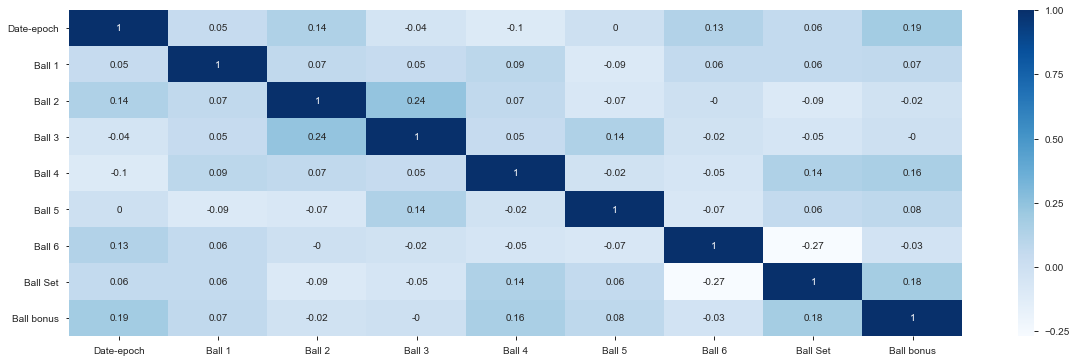

In [151]:
# A heatmap can show the number between different features.

# generating pairwise correlation 
plt.figure(figsize=(20,6))

df_small = df[cols]
corr = round(df_small.corr(),2) 
  



# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        #yticklabels=corr.columns,cmap ='coolwarm',annot=True)
        yticklabels=corr.columns,annot=True, cmap='Blues', fmt='g')

In [131]:
from sklearn.model_selection import train_test_split

y = df['Ball bonus']
X = df[cols].drop('Ball bonus',axis=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
print(X_train.shape)
print(X_test.shape)

(67, 9)
(33, 9)


In [132]:
X_train.head()

,Date-epoch,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball Set,Machine
53,1595030400,20,1,32,42,33,24,11,Merlin
61,1592611200,48,30,26,40,7,21,10,Merlin
9,1608336000,4,28,21,10,27,14,7,Guinevere
6,1609286400,17,21,11,49,37,24,5,Lancelot
77,1587772800,21,9,25,3,28,59,6,Lancelot


In [133]:
ohe = OneHotEncoder()


In [134]:
ct = make_column_transformer(
    (ohe, ['Machine']),
    remainder='passthrough')

In [135]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Machine'])])

In [136]:
logreg = LinearRegression()


In [137]:
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([19.88334282, 29.52477641, 23.46253049, 15.15942193, 52.89145923,
       23.54085931, 47.08727346, 33.01034386, 31.03163471, 45.9220768 ,
       39.5393657 , 28.4614386 , 30.32528263, 29.69574563, 28.43690219,
       23.48868001, 33.71333981, 35.67707272, 27.41319765, 22.46231463,
       13.89591472, 44.70513622, 28.06439596, 38.12991536, 43.98418785,
       29.2085522 , 40.42515366, 16.4238177 , 39.76765218, 32.95786614,
       35.7131987 , 18.30796456, 17.05633935])

In [139]:
# Evaluating and tuning a Pipeline
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

18.145229038717357

In [140]:
cross_val_score(pipe, X, y, cv=5, scoring='r2').mean()

-0.9348632122872284

In [141]:
knn = KNeighborsRegressor()
pipe = make_pipeline(ct, knn)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

15.751999999999999

In [142]:
cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()

-0.4602035411594555

In [143]:
dtr = DecisionTreeRegressor()
pipe = make_pipeline(ct, dtr)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

18.85

In [144]:
cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()

-1.2785814766851675

In [145]:
rfr = RandomForestRegressor()
pipe = make_pipeline(ct, rfr)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

16.7366

In [146]:
cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()

-0.5546042162642244

In [147]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/3d/1b/83e5dc0021d12884e9998999945e156cf3628a79dacecaed2ede9f3107cb/xgboost-1.3.3-py3-none-win_amd64.whl


Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'C:\\Users\\annab\\Anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'



In [148]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
pipe = make_pipeline(ct, xgb)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

17.55040246963501

In [150]:
cross_val_score(pipe,X,y,cv=5,scoring='r2')

array([-0.30765619, -0.64187539, -1.00995922, -0.92757999, -0.98932718])

In [149]:
cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()

-0.7752795935464645

### Conclusion
- Looks like KNN is the winner according to MAE, so next I will use GridSearch to tune the model

In [103]:
knn = KNeighborsRegressor()
pipe = make_pipeline(ct, knn)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
from sklearn.model_selection import cross_val_score
-cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()

13.505274725274726

In [111]:
R2= cross_val_score(knn,X_train,y_train,cv = 10)
R2

C:\Users\annab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1108, in fit
    multi_output=True)
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 802, in check_X_y
    estimator=estimator)
  File "C:\Users\annab\Anaconda3\lib\site-packages\sklearn\utils

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [104]:
pipe.named_steps.keys()

dict_keys(['columntransformer', 'kneighborsregressor'])

In [105]:
params = {}

params = {'kneighborsregressor__n_neighbors':np.arange(2,10), 
          'kneighborsregressor__weights':['uniform','distance'], 
          'kneighborsregressor__metric':['minkowski','euclidean','manhattan'], 
          'kneighborsregressor__leaf_size':[1,2,3,5]
         }

params

{'kneighborsregressor__n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'kneighborsregressor__weights': ['uniform', 'distance'],
 'kneighborsregressor__metric': ['minkowski', 'euclidean', 'manhattan'],
 'kneighborsregressor__leaf_size': [1, 2, 3, 5]}

In [106]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train);

In [107]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__leaf_size,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004806,0.003924,0.003200,0.003919,1,minkowski,2,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-17.428571,-9.821429,-13.423077,-12.307692,-14.000000,-13.396154,2.473425,157
1,0.001607,0.003213,0.004794,0.003914,1,minkowski,2,distance,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-17.050104,-11.811421,-14.518304,-12.921568,-13.603132,-13.980906,1.770895,185
2,0.001606,0.003213,0.004793,0.003914,1,minkowski,3,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-13.428571,-10.380952,-15.358974,-12.256410,-13.307692,-12.946520,1.627338,13
3,0.004802,0.003921,0.000000,0.000000,1,minkowski,3,distance,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-13.951759,-11.165880,-16.008845,-12.363621,-13.448888,-13.387799,1.623424,129
4,0.001601,0.003202,0.001601,0.003202,1,minkowski,4,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-13.482143,-10.767857,-17.903846,-10.480769,-14.307692,-13.388462,2.704245,137
5,0.003201,0.003921,0.001600,0.003201,1,minkowski,4,distance,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-13.894025,-10.586546,-17.203235,-11.046401,-13.903357,-13.326713,2.382860,101
6,0.003191,0.003908,0.002520,0.002908,1,minkowski,5,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-12.514286,-12.642857,-17.015385,-11.384615,-13.969231,-13.505275,1.936964,169
7,0.001612,0.003224,0.001596,0.003192,1,minkowski,5,distance,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-13.365743,-10.991617,-17.064034,-11.358584,-13.918772,-13.339750,2.174626,113
8,0.002092,0.003119,0.003189,0.003906,1,minkowski,6,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-11.869048,-12.238095,-16.128205,-11.910256,-13.064103,-13.041941,1.601754,49
9,0.005214,0.004332,0.001088,0.001366,1,minkowski,6,distance,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-12.511358,-10.799730,-16.664707,-11.538246,-13.574551,-13.017719,2.048185,41


In [108]:
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__leaf_size,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.003218,0.003941,0.001602,0.003203,1,manhattan,7,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
106,0.000903,0.001109,0.004782,0.003904,3,minkowski,7,uniform,"{'kneighborsregressor__leaf_size': 3, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
26,0.003622,0.004484,0.000000,0.000000,1,euclidean,7,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
74,0.003419,0.004204,0.003229,0.003955,2,euclidean,7,uniform,"{'kneighborsregressor__leaf_size': 2, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
154,0.003203,0.003922,0.002021,0.003081,5,minkowski,7,uniform,"{'kneighborsregressor__leaf_size': 5, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
170,0.002406,0.003207,0.004162,0.004351,5,euclidean,7,uniform,"{'kneighborsregressor__leaf_size': 5, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
10,0.001612,0.003224,0.003187,0.003903,1,minkowski,7,uniform,"{'kneighborsregressor__leaf_size': 1, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
186,0.003666,0.004556,0.002051,0.003071,5,manhattan,7,uniform,"{'kneighborsregressor__leaf_size': 5, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
122,0.003232,0.003959,0.001575,0.003151,3,euclidean,7,uniform,"{'kneighborsregressor__leaf_size': 3, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1
138,0.001592,0.003184,0.001607,0.003213,3,manhattan,7,uniform,"{'kneighborsregressor__leaf_size': 3, 'kneighb...",-11.755102,-11.979592,-16.285714,-11.307692,-13.164835,-12.898587,1.801476,1


In [109]:
grid.best_score_

-12.898587127158555

In [110]:
grid.best_params_

{'kneighborsregressor__leaf_size': 1,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__n_neighbors': 7,
 'kneighborsregressor__weights': 'uniform'}

In [ ]:
R2= cross_val_score(lin,X,y,cv = 10)
R2